In [1]:
import pandas as pd

In [3]:
df_orders =  pd.read_excel("List_of_Orders_1.xlsx")

In [5]:
df_details =  pd.read_excel("Order_Details_1.xlsx")

In [7]:
df_target =  pd.read_excel("Sales_target_1.xlsx")

In [11]:
merged_df = pd.merge(df_details, df_orders, on="Order ID")

In [13]:
merged_df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275,-1148,7,Furniture,Bookcases,2018-04-01,Bharat,Gujarat,Ahmedabad
1,B-25601,66,-12,5,Clothing,Stole,2018-04-01,Bharat,Gujarat,Ahmedabad
2,B-25601,8,-2,3,Clothing,Hankerchief,2018-04-01,Bharat,Gujarat,Ahmedabad
3,B-25601,80,-56,4,Electronics,Electronic Games,2018-04-01,Bharat,Gujarat,Ahmedabad
4,B-25602,168,-111,2,Electronics,Phones,2018-04-01,Pearl,Maharashtra,Pune
...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,835,267,5,Electronics,Phones,2019-03-30,Bhishm,Maharashtra,Mumbai
1496,B-26099,2366,552,5,Clothing,Trousers,2019-03-30,Bhishm,Maharashtra,Mumbai
1497,B-26100,828,230,2,Furniture,Chairs,2019-03-31,Hitika,Madhya Pradesh,Indore
1498,B-26100,34,10,2,Clothing,T-shirt,2019-03-31,Hitika,Madhya Pradesh,Indore


In [17]:
top_states = merged_df["State"].value_counts().head(5).index.tolist()
statewise_df = merged_df[merged_df["State"].isin(top_states)]

In [19]:
state_performance = statewise_df.groupby("State").agg(
Order_Count=("Order ID", "count"),
Total_Sales=("Amount", "sum"),
Avg_Profit=("Profit", "mean")
).reset_index()

In [21]:
print(state_performance)

            State  Order_Count  Total_Sales  Avg_Profit
0           Delhi           74        22531   40.364865
1         Gujarat           87        21058    5.344828
2  Madhya Pradesh          340       105140   16.326471
3     Maharashtra          290        95348   21.296552
4       Rajasthan           74        21149   16.986486


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
sns.set_style("whitegrid")

C:\Users\Rupam\AppData\Local\Temp\ipykernel_24764\3911232467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="State", y="Total_Sales", data=state_performance, palette="coolwarm")


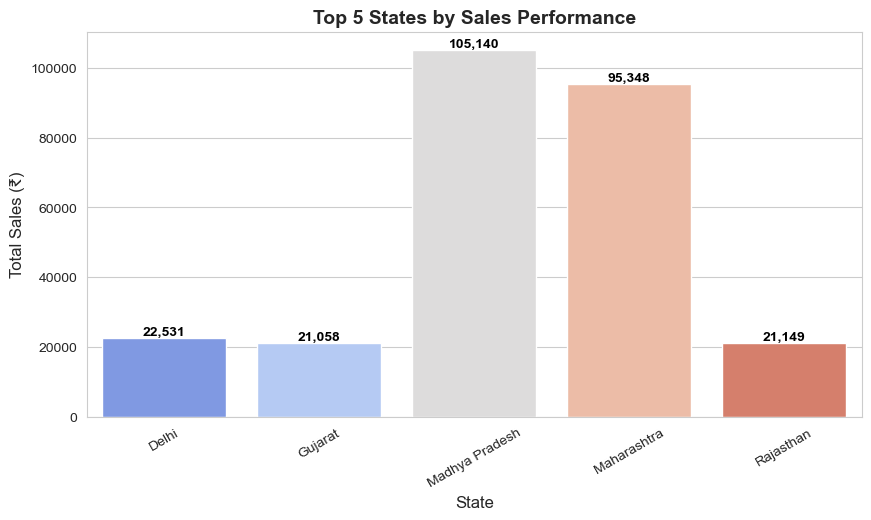

In [33]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="State", y="Total_Sales", data=state_performance, palette="coolwarm")

plt.xlabel("State", fontsize=12)
plt.ylabel("Total Sales (₹)", fontsize=12)
plt.title("Top 5 States by Sales Performance", fontsize=14, fontweight='bold')

plt.xticks(rotation=30)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
(p.get_x() + p.get_width() / 2., p.get_height()),
ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
# Show the plot
plt.show()